# Mini Project - Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## Stage 1 - Conversion Rate Analysis Based on Income, Spending and Age

### Import File and Libraries

In [ ]:
!gdown 1y4g5NRzhIpTppEHuiFDFa7QieZaYYfQH

Downloading...
From: https://drive.google.com/uc?id=1y4g5NRzhIpTppEHuiFDFa7QieZaYYfQH
To: /content/marketing_campaign_data.csv
100% 264k/264k [00:00<00:00, 74.7MB/s]


https://drive.google.com/file/d/1y4g5NRzhIpTppEHuiFDFa7QieZaYYfQH/view?usp=share_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from google.colab import files

from datetime import datetime

#Handling Outlier
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#K-Means Clustering
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA

# Evaluation: Silhouette Score
from sklearn.metrics import silhouette_score

from IPython.display import HTML

### Load Dataset

In [ ]:
df = pd.read_csv('/content/marketing_campaign_data.csv')
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
1169        1169  2410        1969        S1         Lajang  81657000.0   
883          883  8017        1981        D3        Menikah  51111000.0   
1246        1246  4136        1992       SMA         Lajang   7500000.0   
1902        1902  5896        1987        S2        Menikah  73395000.0   
2143        2143  9727        1957        S1        Menikah  23539000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
1169        0         0  22-01-2014       69  ...                  1   
883         1         1  19-06-2014       83  ...                  6   
1246        1         0  03-12-2012       63  ...                  9   
1902        0         0  18-03-2014       94  ...                  2   
2143        0         0  28-02-2014       13  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1169             0             0             0             0             0   
883              0             0             0             0             0   
1246             0             0             0             0             0   
1902             0             0             0             0             0   
2143             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
1169         0              3         11         0  
883          0              3         11         0  
1246         0              3         11         0  
1902         0              3         11         0  
2143         0              3         11         0  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
#checking missing value
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check the unique values
for i in df.columns:
  print('------------------------------')
  print(i,"column's unique values are:",df[i].unique())
  print('------------------------------', '\n')

------------------------------
Unnamed: 0 column's unique values are: [   0    1    2 ... 2237 2238 2239]
------------------------------ 

------------------------------
ID column's unique values are: [5524 2174 4141 ... 7270 8235 9405]
------------------------------ 

------------------------------
Year_Birth column's unique values are: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
------------------------------ 

------------------------------
Education column's unique values are: ['S1' 'S3' 'S2' 'SMA' 'D3']
------------------------------ 

------------------------------
Marital_Status column's unique values are: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
------------------------------ 

------------------------------


In [ ]:
# Check total columns value
for col in df:
    print('------------------------------')
    print(f'''Unique Value count kolom {col}:''')
    print(df[col].value_counts())
    print('------------------------------', '\n')

------------------------------
Unique Value count kolom Unnamed: 0:
0       1
1496    1
1490    1
1491    1
1492    1
       ..
740     1
739     1
738     1
737     1
2239    1
Name: Unnamed: 0, Length: 2240, dtype: int64
------------------------------ 

------------------------------
Unique Value count kolom ID:
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64
------------------------------ 

------------------------------
Unique Value count kolom Year_Birth:
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988   

### Exploratory Data Analysis (conversion rate based on income, spending, and age)

In [ ]:
# Handling Odd Values: Change Dt_Customer datatype from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-9-28dba64cc0f3>:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-9-28dba64cc0f3>:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-9-28dba64cc0f3>:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-9-28dba64cc0f3>:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-9-28dba64cc0f3>:2: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

#### Feature Engineering (Feature Extraction)

##### Customer Age

In [ ]:
year = datetime.now().year
year

2023

In [ ]:
df['age'] = year - df['Year_Birth']

In [ ]:
# Age Grouping
age_group = []
for x in df['age']:
    if x >= 0 and x <= 12:
      stage = 'Anak-Anak'
    elif x >= 13 and x <= 17:
      stage = 'Remaja'
    elif x >= 18 and x <= 35:
      stage = 'Dewasa Awal'
    elif x >= 36 and x <= 65:
      stage = 'Dewasa Akhir'
    else:
      stage = 'Lanjut Usia'
    age_group.append(stage)

df['age_group'] = age_group

##### Customer Dependent

In [ ]:
df['dependent'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['parent'] = np.where(df['dependent'] > 0, 1, 0)

##### Customer Total Purchases

In [ ]:
df['total_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

##### Customer Amount Transaction

In [ ]:
df['amount_transaction'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

##### Total Accepted Campaign

In [ ]:
acc_camp = [col for col in df.columns if 'AcceptedCmp' in col]

df['total_acc_camp'] = df[acc_camp].sum(axis=1)

##### Conversion Rate

In [ ]:
# df['cvr'] = round((df['Response'] / df['NumWebVisitsMonth']), 3)

In [ ]:
def div(x,y):
    if y == 0:
        return 0
    return x / y
df['cvr'] = df.apply(lambda x: div(x['total_purchases'],x['NumWebVisitsMonth']), axis=1)

##### Total Joined Days

In [ ]:
df['total_joined_days'] = (datetime.now() - df['Dt_Customer']).dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [ ]:
cats = ['Education', 'Marital_Status', 'AcceptedCmp1', 
        'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
        'AcceptedCmp5', 'Complain', 'Response', 
        'parent', 'age_group']

nums = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 
        'MntFishProducts',  'MntSweetProducts', 'MntGoldProds', 
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
        'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 
        'Z_Revenue', 'age', 'dependent', 'amount_transaction', 
        'total_purchases', 'total_joined_days', 'total_acc_camp', 'cvr']

#### Univariate Analisys

<ipython-input-24-84cff1037c11>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features[i]],
<ipython-input-24-84cff1037c11>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features[i]],
<ipython-input-24-84cff1037c11>:5: UserWarning: 

`distplot` is a deprecated function and will be re

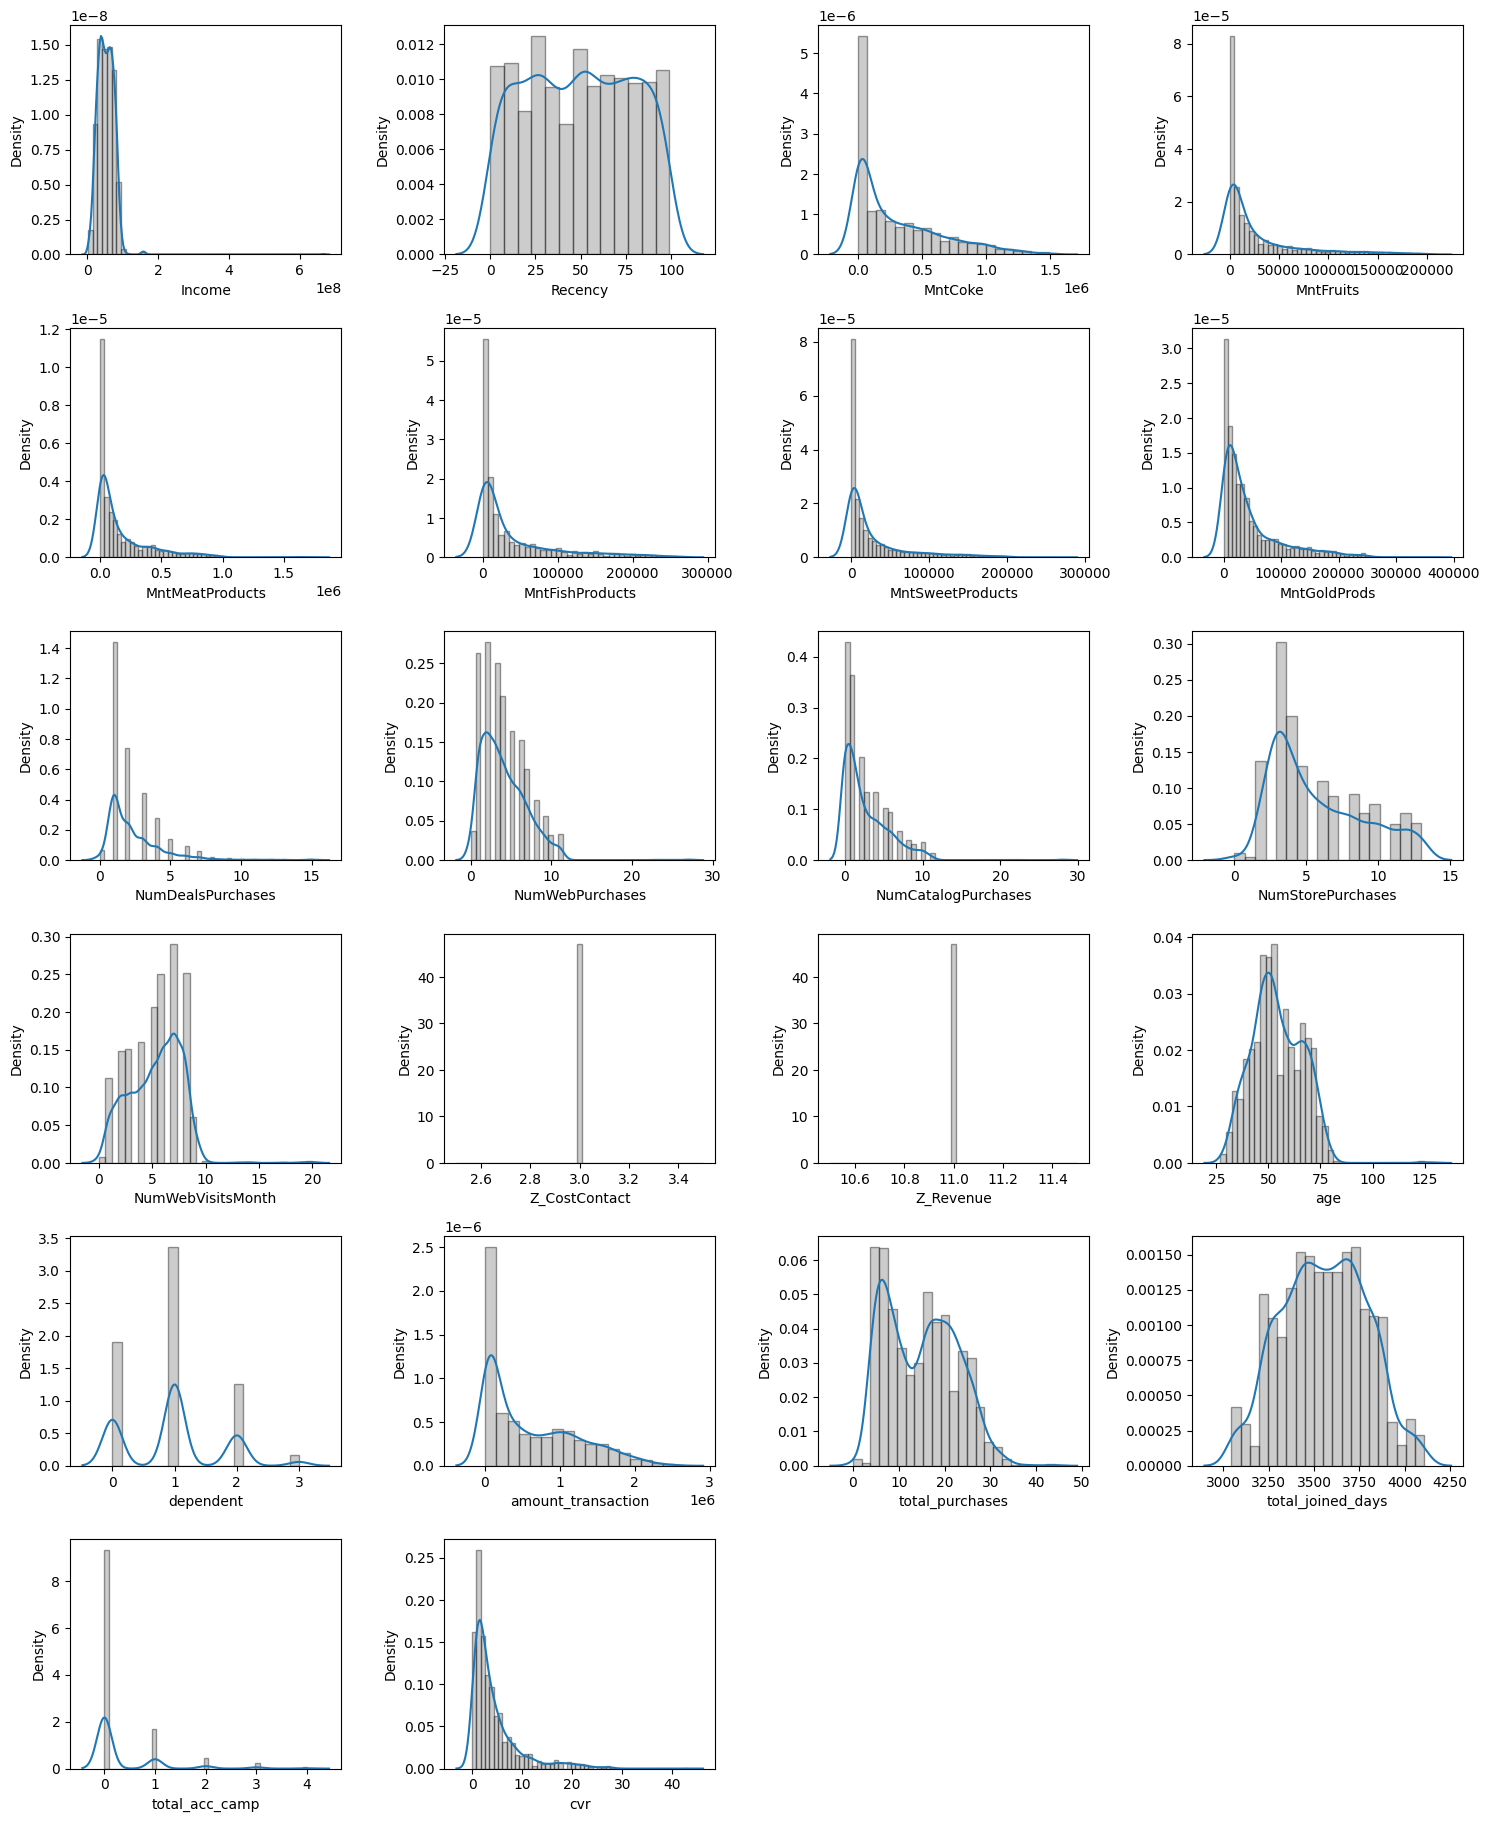

In [ ]:
features = nums
plt.figure(figsize=(15, 30))
for i in range(0, len(features)):
    plt.subplot(10, 4, i+1)
    sns.distplot(df[features[i]],
                 hist_kws={'color' : 'gray', 'edgecolor' : "black"})
    plt.tight_layout()

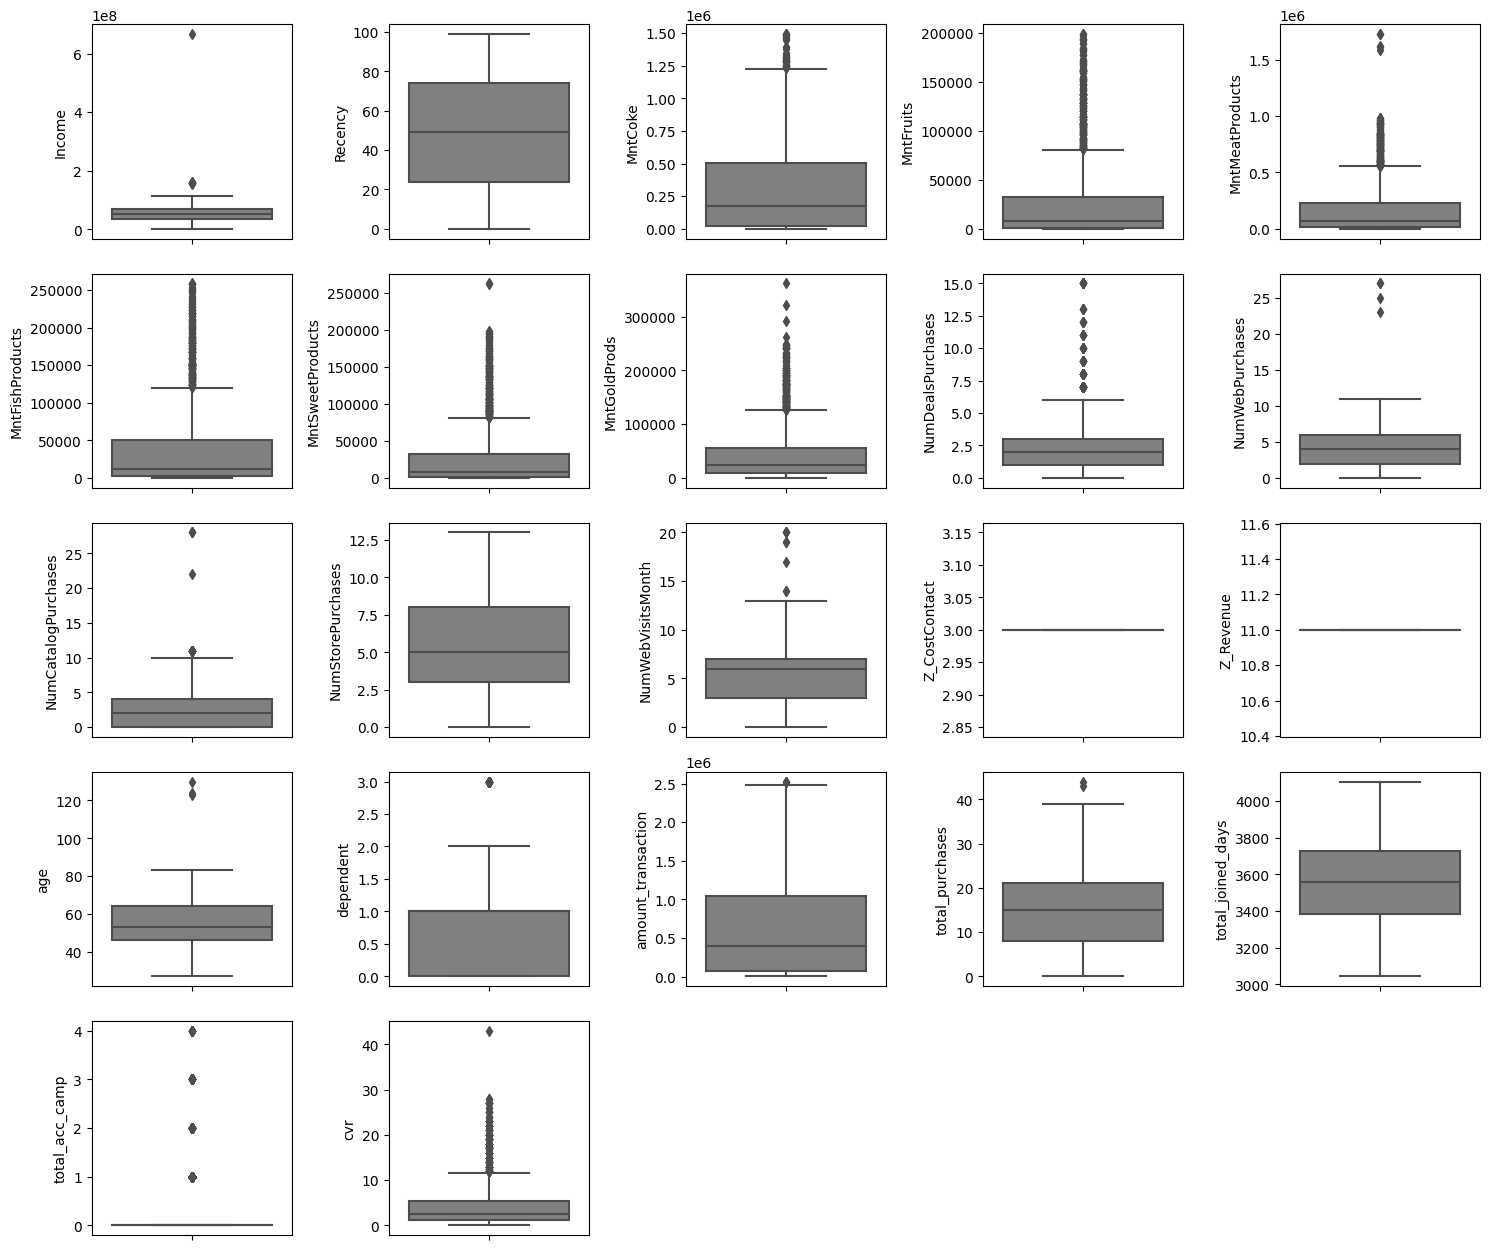

In [ ]:
features = nums
plt.figure(figsize=(15, 30))
for i in range(0, len(features)):
    plt.subplot(12, 5, i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

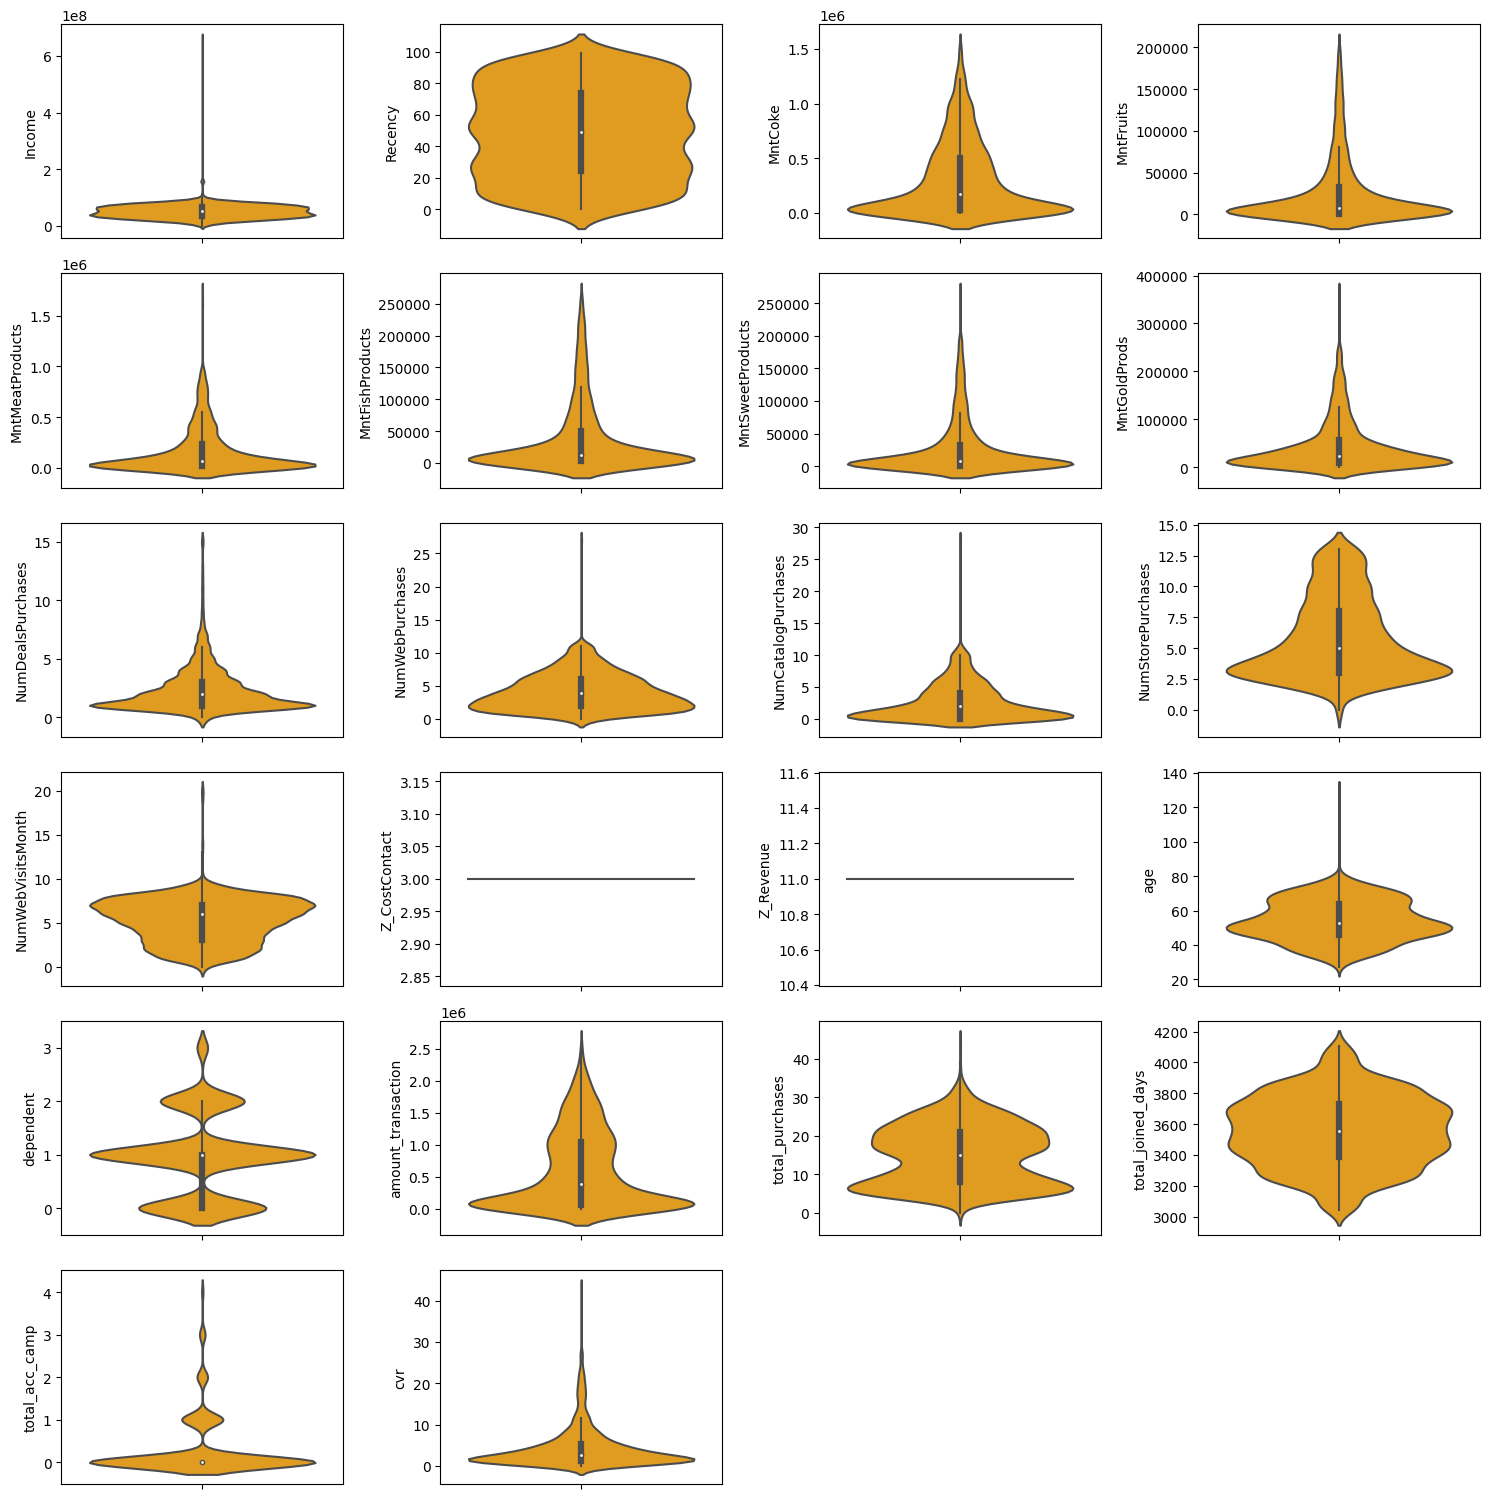

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 4, i+1)
    sns.violinplot(y=df[nums[i]], color='orange', orient='v')
    plt.tight_layout()

#### Multivariate Analisys

<Axes: >

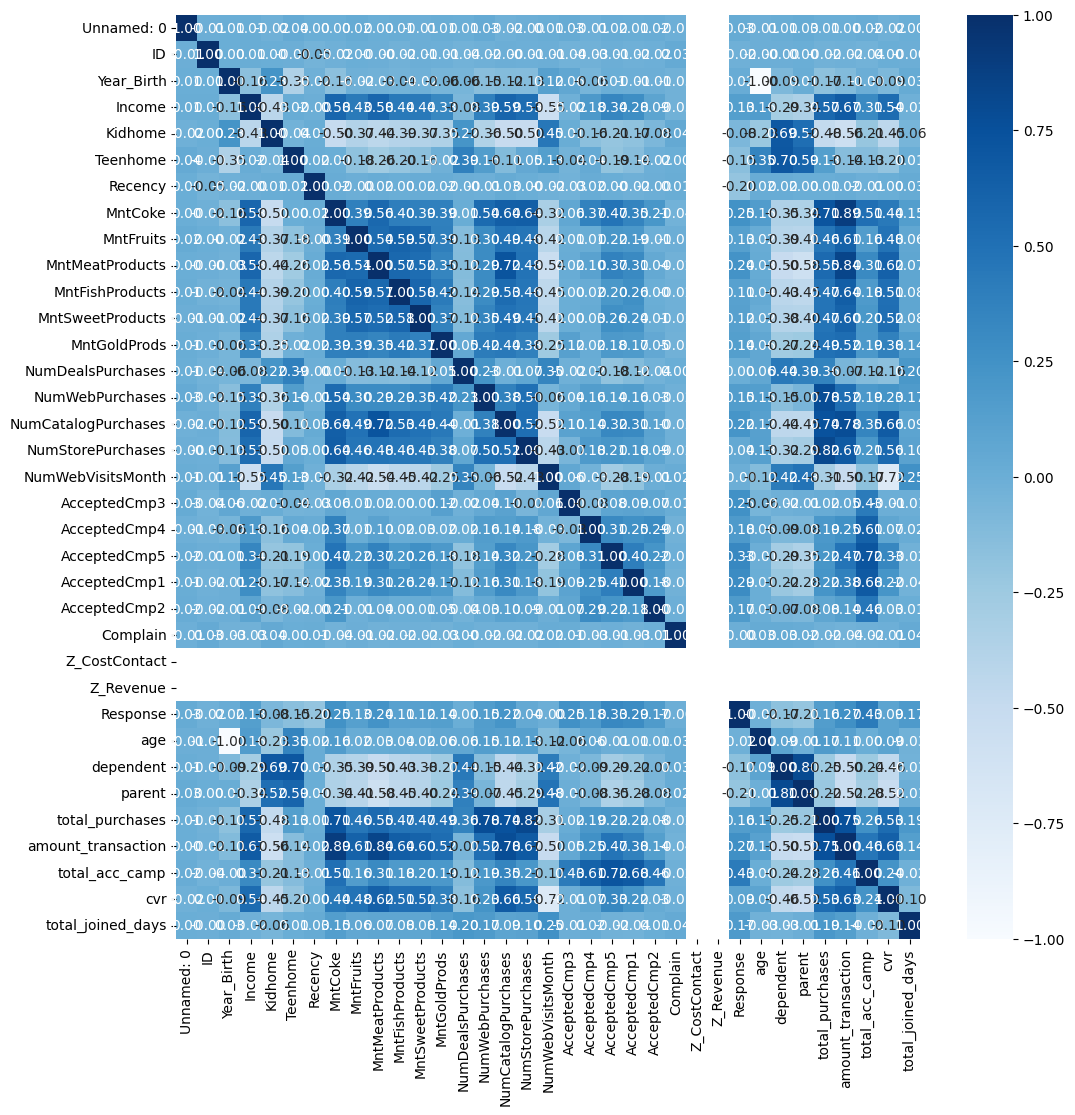

In [ ]:
# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df1 = df.groupby('age_group').agg({'cvr':'sum'}).reset_index()
df1['total_cvr'] = df1['cvr'].sum()
df1['cpp'] = round((df1['cvr']/df1['total_cvr'])*100, 3)
df1

age_group          cvr    total_cvr     cpp
0  Dewasa Akhir  6674.321345  9845.297974  67.792
1   Dewasa Awal   652.912740  9845.297974   6.632
2   Lanjut Usia  2518.063889  9845.297974  25.576

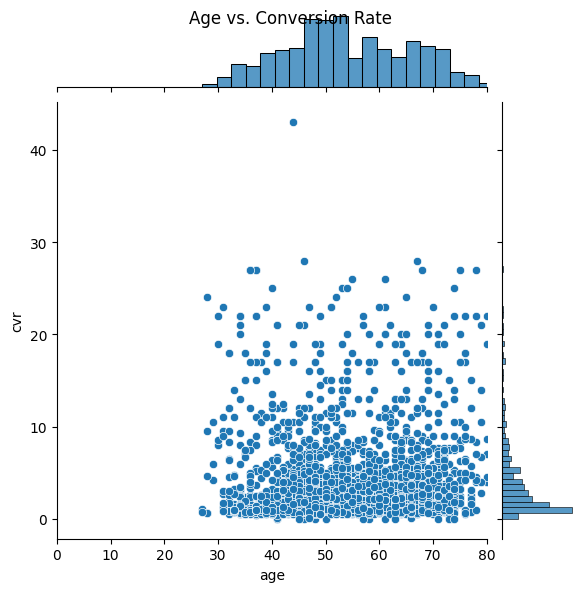

In [ ]:
plot = sns.jointplot(x=df['age'], y=df['cvr'])
plot.fig.suptitle('Age vs. Conversion Rate')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

(0.0, 120000000.0)

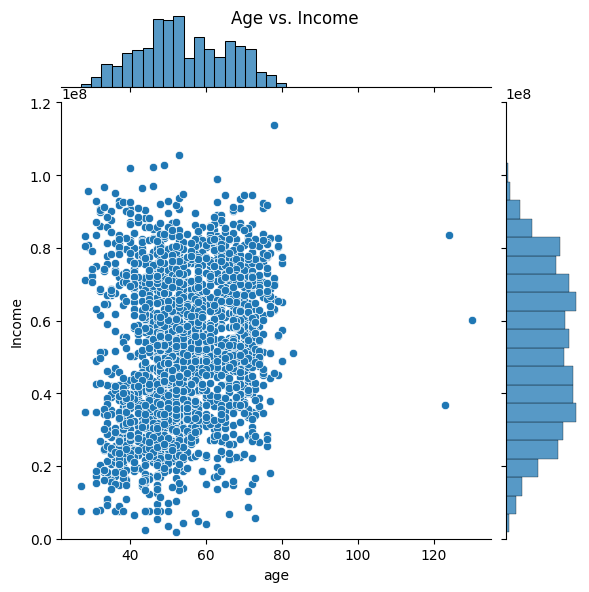

In [ ]:
plot = sns.jointplot(x=df['age'], y=df['Income'])
plot.fig.suptitle('Age vs. Income')
plot.ax_marg_y.set_ylim(0, 120000000)

Text(0.5, 0.98, 'Age vs. Spent')

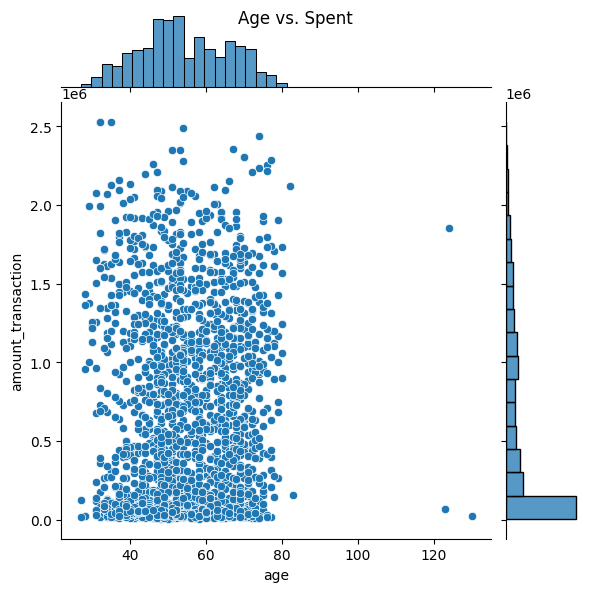

In [ ]:
plot = sns.jointplot(x=df['age'], y=df['amount_transaction'])
plot.fig.suptitle('Age vs. Spent')

(0.0, 120000000.0)

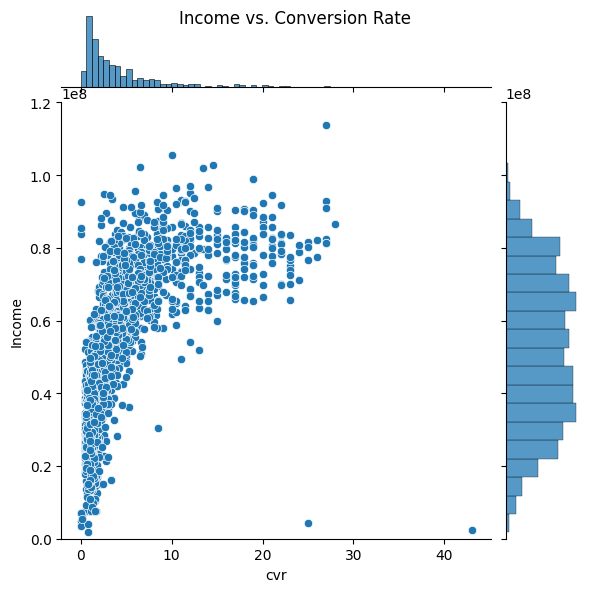

In [ ]:
plot = sns.jointplot(x=df['cvr'], y=df['Income'])
plot.fig.suptitle('Income vs. Conversion Rate')
plot.ax_marg_y.set_ylim(0, 120000000)

(0.0, 120000000.0)

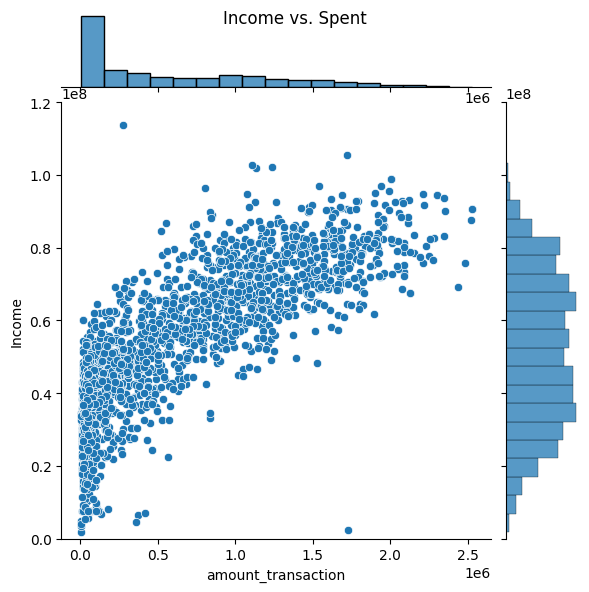

In [ ]:
plot = sns.jointplot(x=df['amount_transaction'], y=df['Income'])
plot.fig.suptitle('Income vs. Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

Text(0.5, 0.98, 'Spent vs. Conversion Rate')

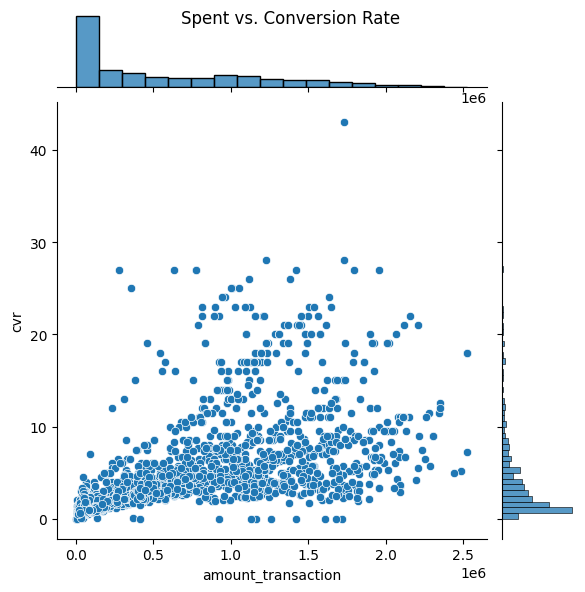

In [ ]:
plot = sns.jointplot(x=df['amount_transaction'], y=df['cvr'])
plot.fig.suptitle('Spent vs. Conversion Rate')

## Stage 2: Data Cleaning & Data Pre-Processing

In [ ]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

#### Handling Null Value

In [ ]:
df1.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
age_group               0
dependent               0
parent                  0
total_purchases         0
amount_transaction      0
total_acc_camp          0
cvr                     0
total_joined

In [ ]:
novalue = df1.isna().sum()*100/len(df1)
print(round(novalue, 4).sort_values(ascending=False))

Income                 1.0714
Unnamed: 0             0.0000
Response               0.0000
AcceptedCmp4           0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
AcceptedCmp2           0.0000
Complain               0.0000
Z_CostContact          0.0000
Z_Revenue              0.0000
age                    0.0000
NumWebVisitsMonth      0.0000
age_group              0.0000
dependent              0.0000
parent                 0.0000
total_purchases        0.0000
amount_transaction     0.0000
total_acc_camp         0.0000
cvr                    0.0000
AcceptedCmp3           0.0000
NumStorePurchases      0.0000
ID                     0.0000
NumCatalogPurchases    0.0000
Year_Birth             0.0000
Education              0.0000
Marital_Status         0.0000
Kidhome                0.0000
Teenhome               0.0000
Dt_Customer            0.0000
Recency                0.0000
MntCoke                0.0000
MntFruits              0.0000
MntMeatProducts        0.0000
MntFishPro

In [ ]:
# Handline Null Data
df1['Income'] = df1['Income'].fillna(df1['Income'].median())

In [ ]:
df1.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
age_group              0
dependent              0
parent                 0
total_purchases        0
amount_transaction     0
total_acc_camp         0
cvr                    0
total_joined_days      0
dtype: int64

### Handling Duplicated Value

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(2240, 39)

### Handling Unnecesary Values

In [ ]:
# Drop Unnecesary Column
df1 = df1.drop(columns=['Unnamed: 0', 'Kidhome', 'Teenhome'])
df1.sample(5)

ID  Year_Birth Education Marital_Status      Income Dt_Customer  \
1959   7530        1950        S3          Janda  56551000.0  2014-07-05   
32     5710        1970        S1    Bertunangan  40548000.0  2012-10-10   
459   10648        1982        D3    Bertunangan  66664000.0  2012-09-25   
581    5314        1951        S1    Bertunangan  40689000.0  2013-03-18   
1410    618        1977        S3        Menikah  69389000.0  2012-09-28   

      Recency  MntCoke  MntFruits  MntMeatProducts  ...  Response  age  \
1959       48    67000       4000            32000  ...         0   73   
32         31   110000          0             5000  ...         0   53   
459        78   398000      96000           447000  ...         0   41   
581        69   270000       3000            27000  ...         0   72   
1410       17   422000       7000           238000  ...         0   46   

         age_group  dependent  parent  total_purchases  amount_transaction  \
1959   Lanjut Usia          2       1               10              138000   
32    Dewasa Akhir          1       1                9              120000   
459   Dewasa Akhir          0       0               19             1289000   
581    Lanjut Usia          1       1               20              444000   
1410  Dewasa Akhir          1       1               22              797000   

      total_acc_camp       cvr  total_joined_days  
1959               0  2.500000               3198  
32                 1  1.800000               3831  
459                0  6.333333               3846  
581                0  2.500000               3672  
1410               0  5.500000               3843  

[5 rows x 36 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

### Feature Encoding

In [ ]:
# label encoder
map_edu = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df1['edu_map'] = df1['Education'].map(map_edu)

In [ ]:
df1.sample(5)

ID  Year_Birth Education Marital_Status      Income Dt_Customer  \
1008  8975        1968        S1        Menikah  19514000.0  2014-01-26   
566   9120        1962        S1         Lajang  66565000.0  2012-05-12   
976   2611        1959        S2    Bertunangan  82576000.0  2012-01-08   
1151  8310        1964        S1    Bertunangan  68142000.0  2012-08-29   
1494  2005        1990        S1        Menikah  35765000.0  2013-11-12   

      Recency  MntCoke  MntFruits  MntMeatProducts  ...  age     age_group  \
1008       47    14000       3000            21000  ...   55  Dewasa Akhir   
566        80   747000      10000           161000  ...   61  Dewasa Akhir   
976        66  1206000      55000           445000  ...   64  Dewasa Akhir   
1151       96   897000     126000           196000  ...   59  Dewasa Akhir   
1494       86    22000       3000            30000  ...   33   Dewasa Awal   

      dependent  parent  total_purchases  amount_transaction  total_acc_camp  \
1008          2       1               10               69000               1   
566           1       1               19             1065000               0   
976           0       0               19             1910000               1   
1151          1       1               24             1459000               0   
1494          1       1                8               75000               0   

            cvr  total_joined_days  edu_map  
1008   1.250000               3358        2  
566    2.375000               3982        2  
976   19.000000               4107        3  
1151   4.000000               3873        2  
1494   1.333333               3433        2  

[5 rows x 37 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

### Feature Selection

RFMLECA analysis is an extended version of RFM analysis that used to divide customers into several segments. Based on RFMLECA analysis, we will need 7 variables:

- R (Recency): How often customers make purchases within a certain time period. => recency

- F (Frequency): How often customers make purchases within a certain time period. => total_purchases

- M (Monetary): How much money customers spend during a certain time period. => amount_transaction

- L (Length of joining member): Length of time since the customer joined. => total_joined_days

- E (Education): Customer's education level. => Education

- C (Accepted Campaign): How many campaigns the customer received and responded to. => total_acc_camp

- A (Age): Customer's age. => Age

In [ ]:
df2 = df1.copy()
df2 = df2[['Recency', 'total_purchases', 'amount_transaction', 'total_joined_days', 'total_acc_camp', 'age']] #'edu_map', 
df2.columns = ['R', 'F', 'M', 'L', 'C', 'A'] #'E', 
df2.describe(include='all')

R            F             M            L            C  \
count  2240.000000  2240.000000  2.240000e+03  2240.000000  2240.000000   
mean     49.109375    14.862054  6.057982e+05  3556.043304     0.297768   
std      28.962453     7.677173  6.022493e+05   232.229893     0.678381   
min       0.000000     0.000000  5.000000e+03  3044.000000     0.000000   
25%      24.000000     8.000000  6.875000e+04  3384.750000     0.000000   
50%      49.000000    15.000000  3.960000e+05  3557.000000     0.000000   
75%      74.000000    21.000000  1.045500e+06  3729.250000     0.000000   
max      99.000000    44.000000  2.525000e+06  4107.000000     4.000000   

                 A  
count  2240.000000  
mean     54.194196  
std      11.984069  
min      27.000000  
25%      46.000000  
50%      53.000000  
75%      64.000000  
max     130.000000

### Outlier Handling

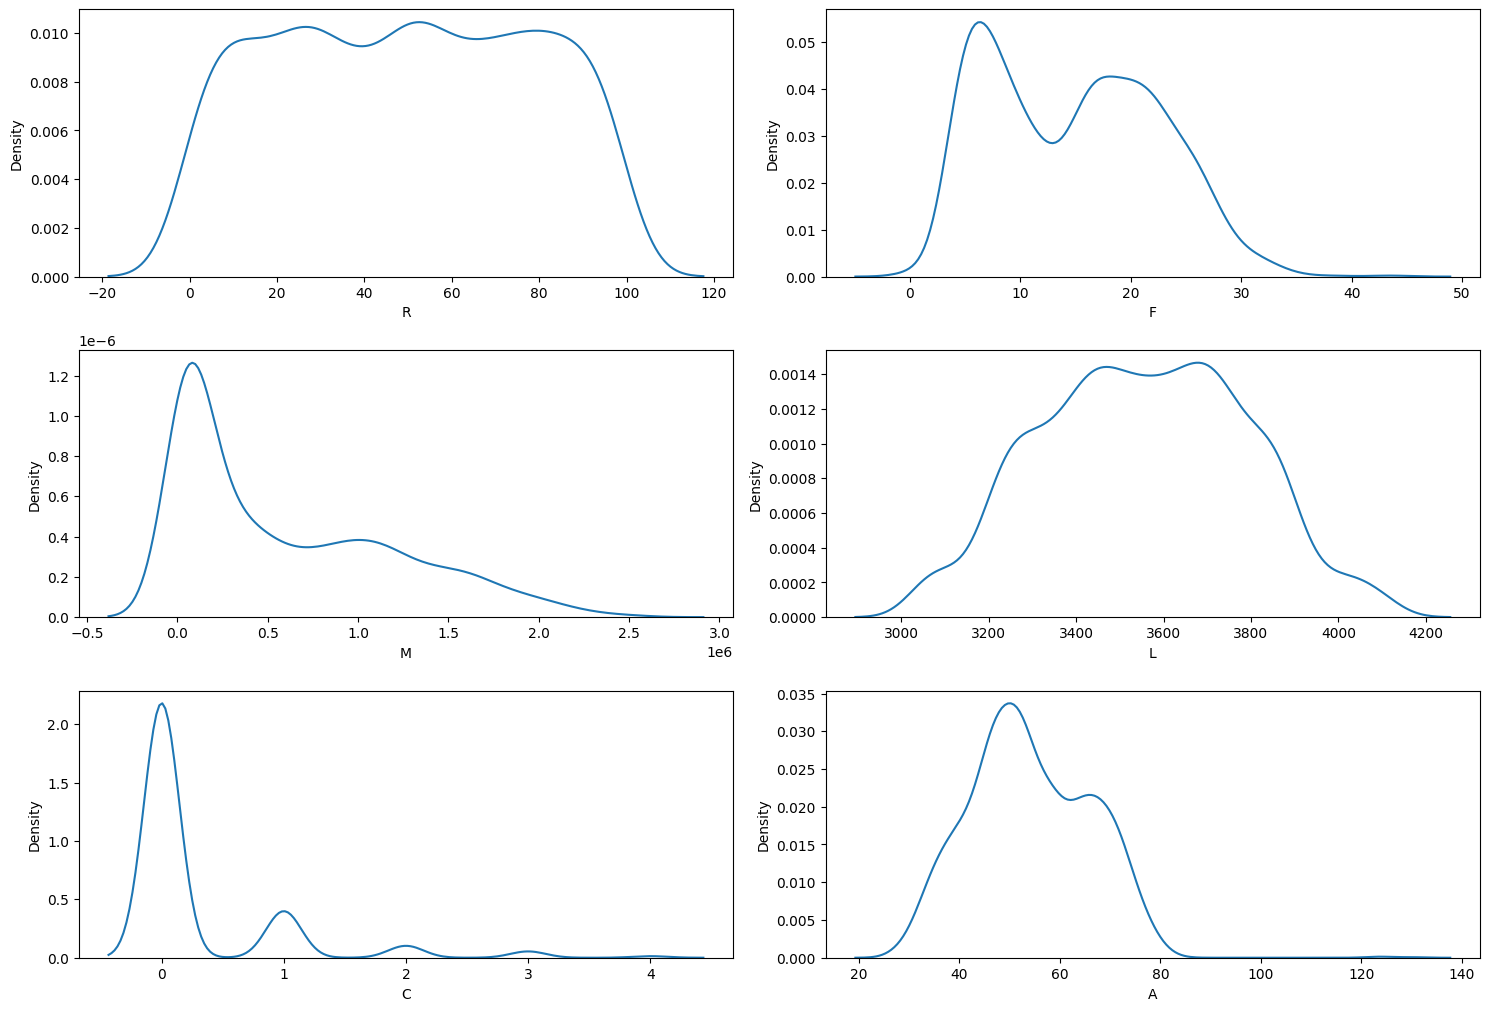

In [ ]:
cols = df2.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df2[cols[i]])
    plt.tight_layout()

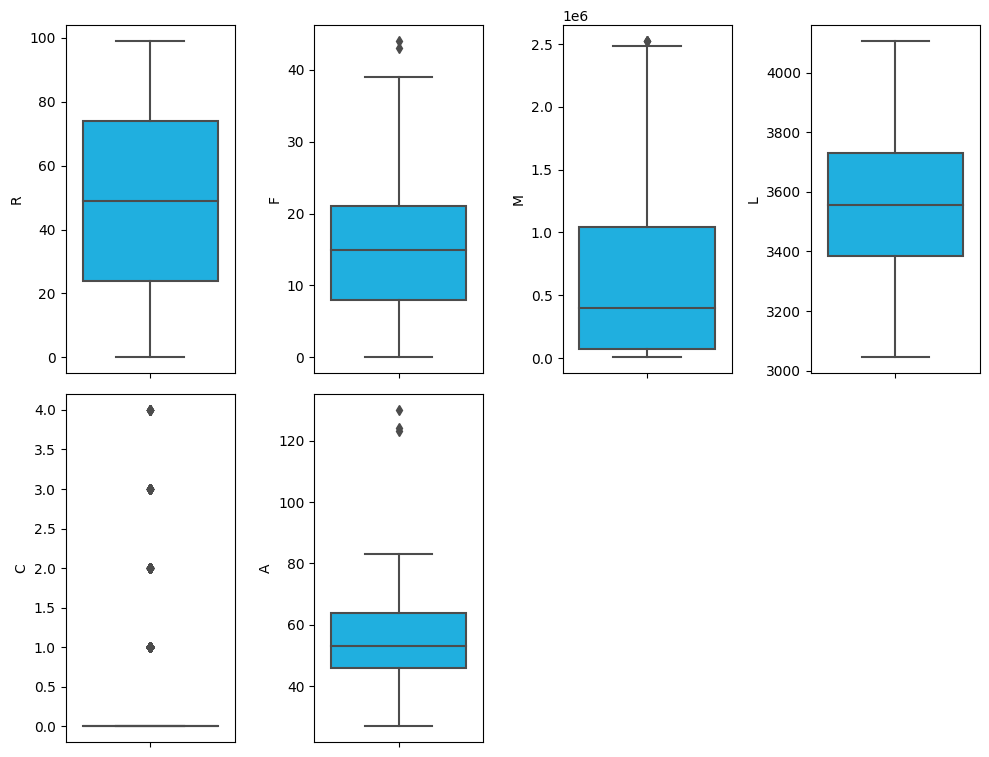

In [ ]:
# Box Plot
plt.figure(figsize = (10,15))
for i in range(0, len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df2[cols[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

In [ ]:
# Handling Outlier using Z-score

#print(f'Total Rows BEFORE Outlier Handling Z-Score = {len(df2)}')

#filtered_entries = np.array([True] * len(df2))
#column = ['F', 'M', 'E', 'A']

#for col in column:
    #zscore = abs(stats.zscore(df2[col]))
    #filtered_entries = (zscore < 3) & filtered_entries 
    
#df2 = df2[filtered_entries] 

#print(f'Total Rows AFTER Outlier Handling Z-Score = {len(df2)}')

In [ ]:
for col in cols:
    high_cut = df2[col].quantile(q=0.99)
    low_cut= df2[col].quantile(q=0.01)
    df2.loc[df2[col]>high_cut,col]=high_cut
    df2.loc[df2[col]<low_cut,col]=low_cut

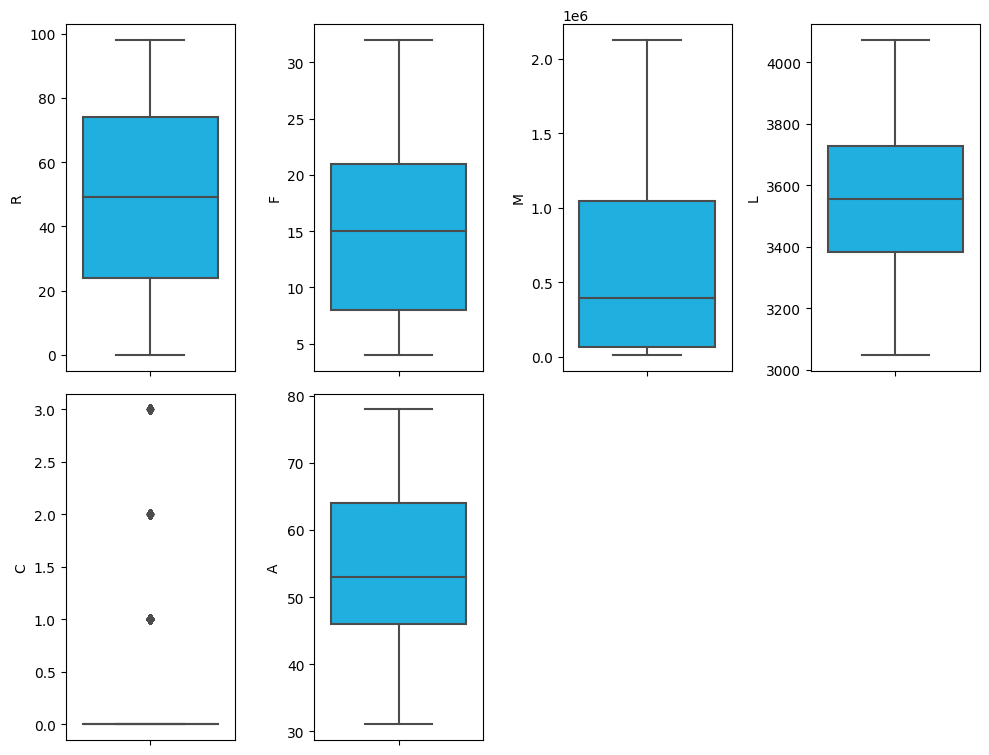

In [ ]:
cols = df2.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df2[cols[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

### Feature Standarization

In [ ]:
std = StandardScaler()
custvalue_std = std.fit_transform(df2)
custvalue_std

array([[ 0.30743885,  1.33669224,  1.69607904,  1.98286293, -0.44737331,
         1.01752194],
       [-0.38357361, -1.16670146, -0.9662581 , -1.67052164, -0.44737331,
         1.27473483],
       [-0.79818109,  0.80966199,  0.28788688, -0.17202939, -0.44737331,
         0.3316209 ],
       ...,
       [ 1.4476094 ,  0.54614686,  1.06649491, -0.85002156,  1.08024286,
        -1.04018117],
       [-1.4200923 ,  1.07317712,  0.40007341, -0.84570314, -0.44737331,
         1.10325957],
       [-0.31447237, -0.50791364, -0.72346635,  1.16668127, -0.44737331,
         1.27473483]])

In [ ]:
df2_std = pd.DataFrame(custvalue_std, columns = df2.columns)
df2_std.sample(5)

R         F         M         L         C         A
60   -1.281890  0.809662  1.396357  0.415276  2.607859 -1.125919
505  -0.694529  1.731965  1.014588  1.581250 -0.447373  1.360472
2081  1.585812  0.019117 -0.257976 -0.422498 -0.447373  1.188997
320  -0.901833  0.809662  0.127142  0.760750 -0.447373 -0.182805
201   0.376540  0.414389  1.156914 -0.267035 -0.447373  0.074408

## Stage 3: Data Modeling

#### Elbow Method Clustering

<Axes: title={'center': 'Elbow Method of K-means Clustering'}>

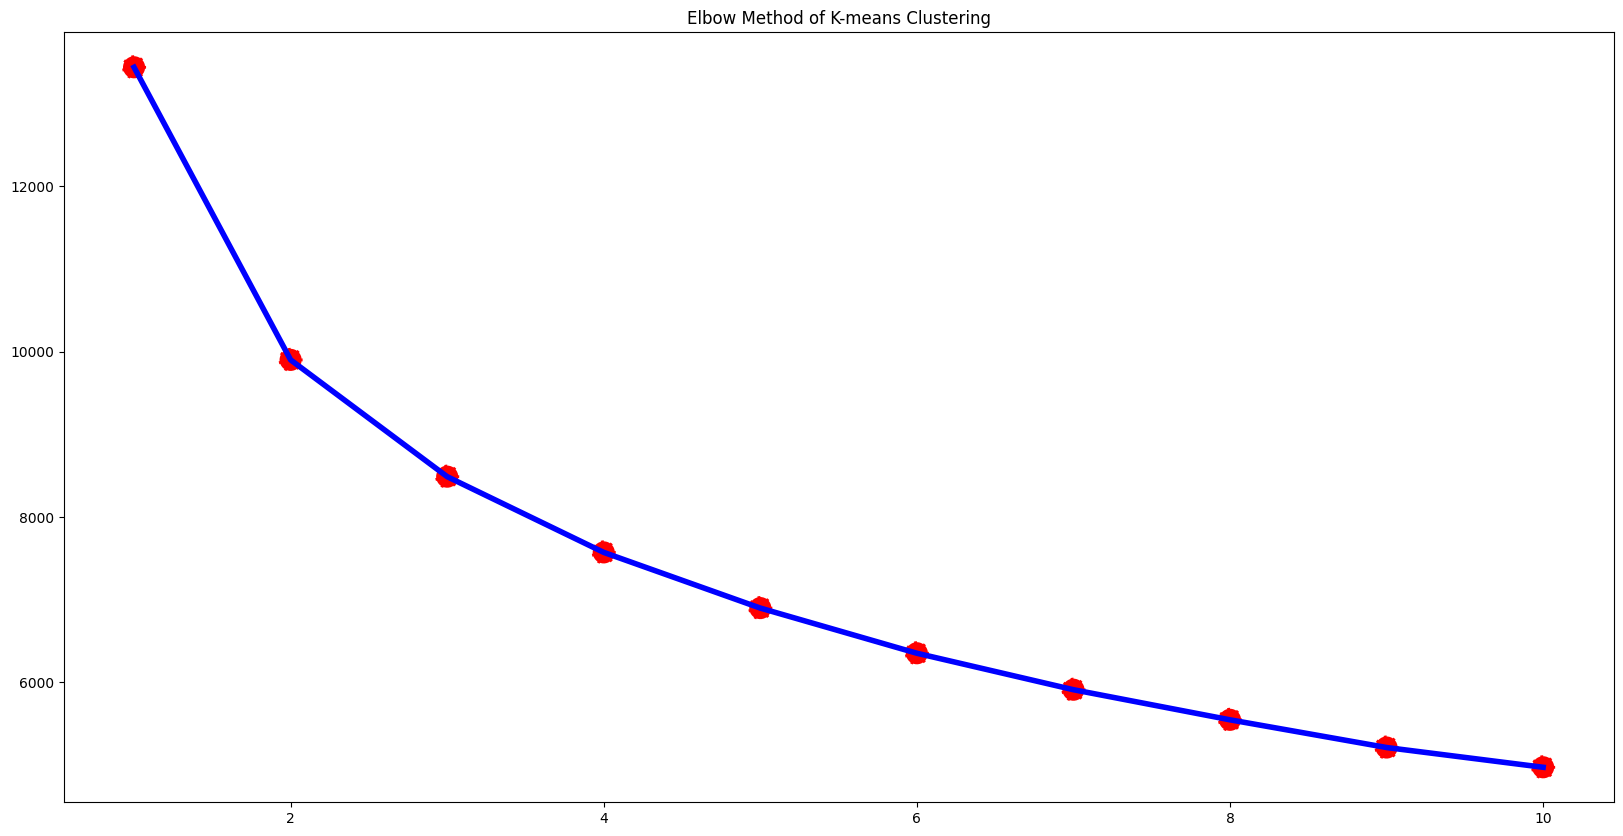

In [ ]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df2_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.title('Elbow Method of K-means Clustering')
sns.lineplot(x=range(1,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(1,11), y = inertia, s = 300, color = 'red', linestyle = '--')

### Eval: Silhouette Score

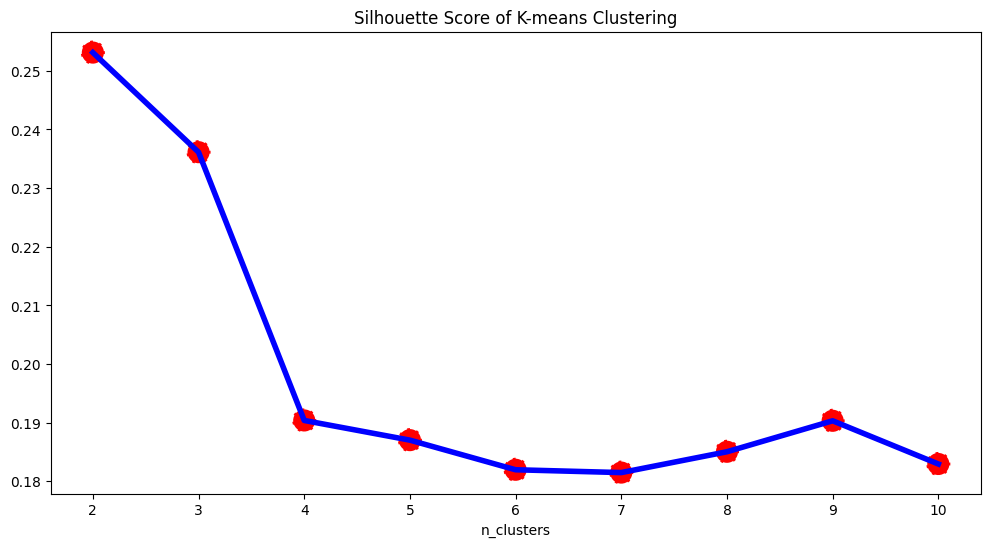

In [ ]:
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df2_std)
    preds = kmeans.predict(df2_std)
    score_euclidean = silhouette_score(df2_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Silhouette Score of K-means Clustering')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color = 'red',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [ ]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

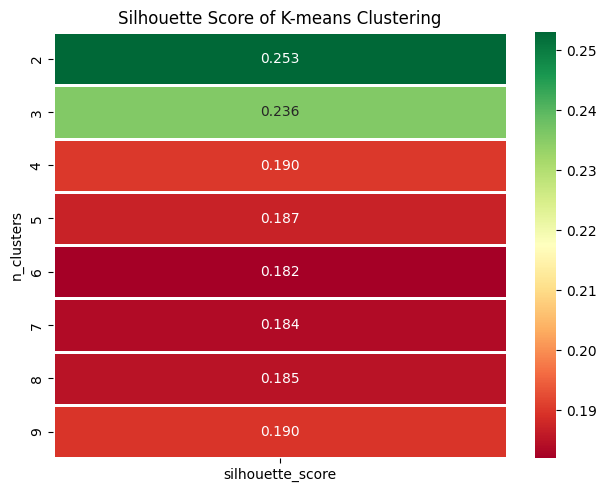

In [ ]:
visualize_silhouette_layer(df2_std)

### K-Means Clustering

In [ ]:
# cluster n=4
kmeans = KMeans(n_clusters = 4, random_state = 0)

# fit model
kc = kmeans.fit(df2_std)
cluster_labels = kc.labels_

# add cluster
df_cluster = df2_std.assign(K_Cluster = cluster_labels)
df_cluster.sample(5)

R         F         M         L         C         A  K_Cluster
561   0.894799  0.546147  1.620730  0.112986 -0.447373 -0.954444          0
371   0.687496  0.150874 -0.586163  1.110542 -0.447373 -0.525755          2
2175 -1.627396  0.546147  2.409384 -0.482956  2.607859 -0.525755          3
1596  1.620363 -0.376156 -0.932770 -0.940708 -0.447373  0.760309          2
93    0.687496 -1.298459 -0.957886 -1.096172 -0.447373 -0.268543          2

In [ ]:
# add cluster
df2_clus = df2.assign(K_Cluster = cluster_labels)
df2_clus.sample(5)

R   F       M       L  C   A  K_Cluster
2077  77   7  102000  3298.0  0  63          2
1051  16   4   13000  3258.0  1  57          1
1079  65   4   20000  3637.0  0  45          2
1025  11  21  702000  3533.0  0  56          0
1143  76   8   86000  3520.0  0  61          2

### PCA

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_cluster)
pcs = pca.transform(df_cluster)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_cluster['K_Cluster']
df_pca.sample(10)

PC 1      PC 2  cluster
1745  1.890638 -1.560140        0
888   0.890176 -1.645023        0
1191  2.770185  2.590360        3
1550 -1.271635  0.504452        2
1956 -1.919029  0.888137        2
247   1.462220 -1.173336        0
82   -1.218940  0.646412        2
1849 -2.015206  1.167363        2
88    0.924439  2.641028        3
1136 -0.894846  0.062568        2

<Axes: title={'center': '2-D Visualization of Customer Clusters\nWith PCA'}, xlabel='PC 1', ylabel='PC 2'>

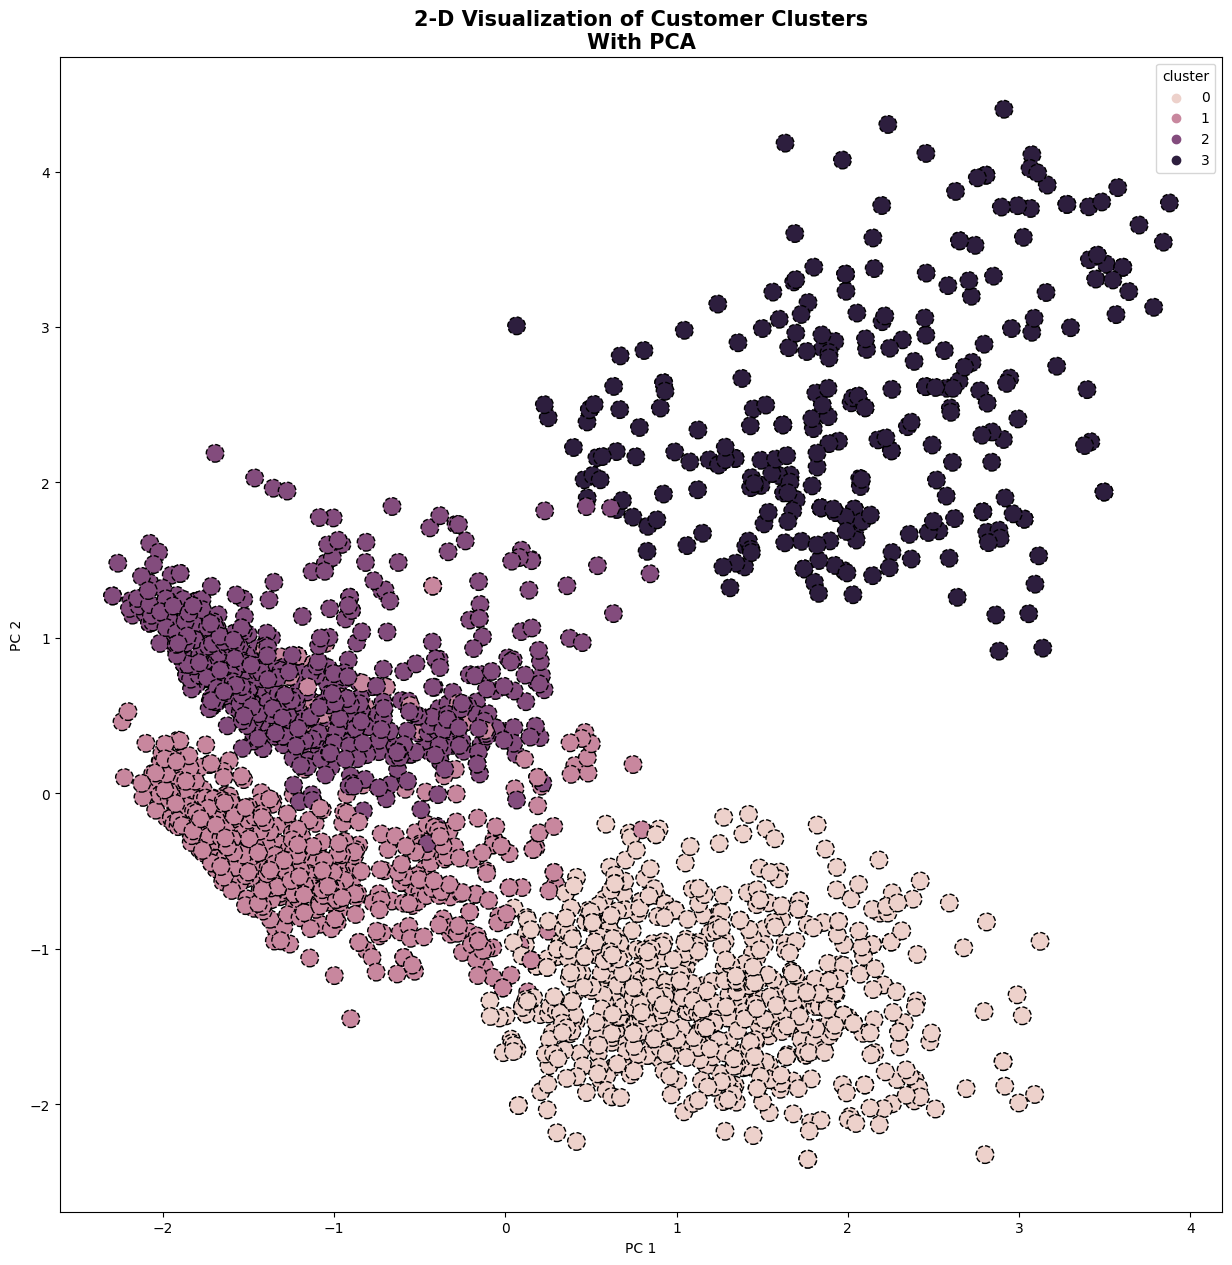

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title("2-D Visualization of Customer Clusters\nWith PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

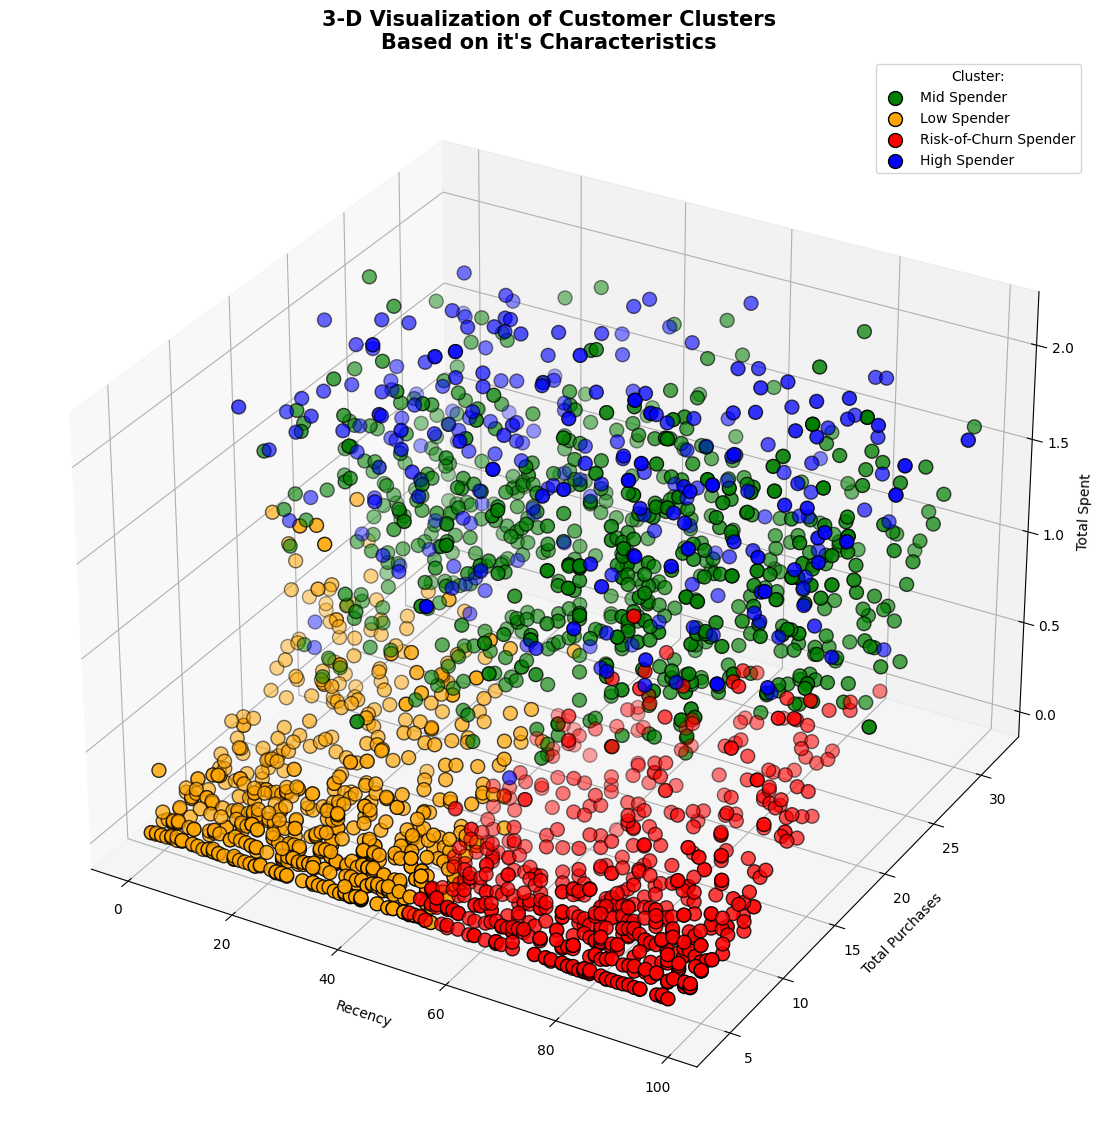

In [ ]:
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df2_clus['R'][df2_clus.K_Cluster == 0], df2_clus['F'][df2_clus.K_Cluster == 0], df2_clus['M'][df2_clus.K_Cluster == 0], c='green', s=100, edgecolor='black', label='Mid Spender')
ax.scatter(df2_clus['R'][df2_clus.K_Cluster == 1], df2_clus['F'][df2_clus.K_Cluster == 1], df2_clus['M'][df2_clus.K_Cluster == 1], c='orange', s=100, edgecolor='black', label='Low Spender')
ax.scatter(df2_clus['R'][df2_clus.K_Cluster == 2], df2_clus['F'][df2_clus.K_Cluster == 2], df2_clus['M'][df2_clus.K_Cluster == 2], c='red', s=100, edgecolor='black', label='Risk-of-Churn Spender')
ax.scatter(df2_clus['R'][df2_clus.K_Cluster == 3], df2_clus['F'][df2_clus.K_Cluster == 3], df2_clus['M'][df2_clus.K_Cluster == 3], c='blue', s=100, edgecolor='black', label='High Spender')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

## Stage 4: Customer Personality Analysis for Marketing Retargeting

#### Summary Per Cluster

In [ ]:
# create pivot table K-Cluster
pivot_cc =  df2_clus.groupby('K_Cluster').agg({'R': ['mean','median'],
                                               'F': ['mean','median'],
                                               'M': ['mean','median'],
                                               'L': ['mean','median'],
                                               'C': ['mean','median'],
                                               'A': ['mean','median']}).reset_index() #'E': ['mean','median'],

In [ ]:
pivot_cc

K_Cluster          R                 F                    M             \
                  mean median       mean median          mean     median   
0         0  49.576389   51.0  22.056944   22.0  1.022621e+06   991000.0   
1         1  23.510301   23.0   9.117274    8.0  1.614992e+05    72000.0   
2         2  75.427642   77.0   9.489431    8.0  1.707870e+05    89000.0   
3         3  47.700730   46.0  21.186131   21.0  1.495934e+06  1540000.0   

             L                 C                 A         
          mean  median      mean median       mean median  
0  3641.442417  3662.0  0.106944    0.0  58.115278   58.5  
1  3505.083106  3488.0  0.096672    0.0  50.854200   50.0  
2  3525.135317  3516.0  0.086179    0.0  53.079675   52.0  
3  3516.674562  3497.5  1.697080    1.0  53.576642   53.0

- Mid Spender C0
- Low Spender C1
- Potential Churn C2
- High Spender C3

In [ ]:
df_final = df1.copy()
df_final['Clusters'] = cluster_labels
df_final.head()

ID  Year_Birth Education Marital_Status      Income Dt_Customer  Recency  \
0  5524        1957        S1         Lajang  58138000.0  2012-04-09       58   
1  2174        1954        S1         Lajang  46344000.0  2014-08-03       38   
2  4141        1965        S1    Bertunangan  71613000.0  2013-08-21       26   
3  6182        1984        S1    Bertunangan  26646000.0  2014-10-02       26   
4  5324        1981        S3        Menikah  58293000.0  2014-01-19       94   

   MntCoke  MntFruits  MntMeatProducts  ...     age_group  dependent  parent  \
0   635000      88000           546000  ...   Lanjut Usia          0       0   
1    11000       1000             6000  ...   Lanjut Usia          2       1   
2   426000      49000           127000  ...  Dewasa Akhir          0       0   
3    11000       4000            20000  ...  Dewasa Akhir          1       1   
4   173000      43000           118000  ...  Dewasa Akhir          1       1   

   total_purchases  amount_transaction  total_acc_camp       cvr  \
0               25             1617000               0  3.571429   
1                6               27000               0  1.200000   
2               21              776000               0  5.250000   
3                8               53000               0  1.333333   
4               19              422000               0  3.800000   

   total_joined_days  edu_map  Clusters  
0               4015        2         0  
1               3169        2         1  
2               3516        2         0  
3               3109        2         1  
4               3365        4         2  

[5 rows x 38 columns]

In [ ]:
map_cluster = {
    0 : 'Medium Spender',
    1 : 'Low Spender',
    2 : 'Risk of Churn',
    3 : 'High Spender'
}

df_final['cluster_mapped'] = df_final['Clusters'].map(map_cluster)

In [ ]:
df_final.head()

ID  Year_Birth Education Marital_Status      Income Dt_Customer  Recency  \
0  5524        1957        S1         Lajang  58138000.0  2012-04-09       58   
1  2174        1954        S1         Lajang  46344000.0  2014-08-03       38   
2  4141        1965        S1    Bertunangan  71613000.0  2013-08-21       26   
3  6182        1984        S1    Bertunangan  26646000.0  2014-10-02       26   
4  5324        1981        S3        Menikah  58293000.0  2014-01-19       94   

   MntCoke  MntFruits  MntMeatProducts  ...  dependent  parent  \
0   635000      88000           546000  ...          0       0   
1    11000       1000             6000  ...          2       1   
2   426000      49000           127000  ...          0       0   
3    11000       4000            20000  ...          1       1   
4   173000      43000           118000  ...          1       1   

   total_purchases  amount_transaction  total_acc_camp       cvr  \
0               25             1617000               0  3.571429   
1                6               27000               0  1.200000   
2               21              776000               0  5.250000   
3                8               53000               0  1.333333   
4               19              422000               0  3.800000   

   total_joined_days  edu_map  Clusters  cluster_mapped  
0               4015        2         0  Medium Spender  
1               3169        2         1     Low Spender  
2               3516        2         0  Medium Spender  
3               3109        2         1     Low Spender  
4               3365        4         2   Risk of Churn  

[5 rows x 39 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

#### Total Customer in Each Cluster

In [ ]:
# Total Customer Each Cluster
df_tc = df2_clus.groupby('K_Cluster').agg({'R':'count'}).reset_index()
df_tc = df_tc.rename(columns={'K_Cluster':'cluster',
                              'R':'total_customers'})
df_tc['sum'] = df_tc['total_customers'].sum()
df_tc['percentage'] = round((df_tc['total_customers']/df_tc['sum'])*100, 3)
df_tc

cluster  total_customers   sum  percentage
0        0              720  2240      32.143
1        1              631  2240      28.170
2        2              615  2240      27.455
3        3              274  2240      12.232

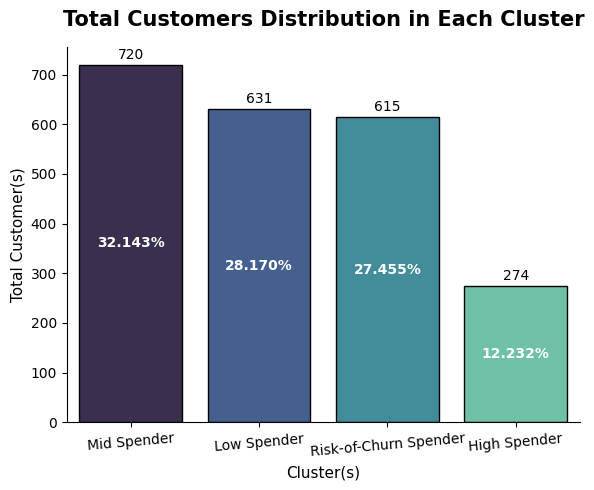

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total Customers Distribution in Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='cluster', y='total_customers', data=df_tc, edgecolor='black', palette='mako')

plt.xlabel('Cluster(s)', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)
plt.xticks(np.arange(4), ['Mid Spender', 'Low Spender', 'Risk-of-Churn Spender', 'High Spender'], rotation=5)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['32.143%', '28.170%', '27.455%', '12.232%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

#### RFMLCA Metrics in Each Cluster

In [ ]:
df_final_clus = df2_clus.copy()
df_final_clus.rename(columns={'R':'Recency',
                              'F':'Total Purchases',
                              'M':'Total Spent',
                              'L':'Joining Days',
                              'C':'Accepted Campaign',
                              'A':'Age',
                              'K_Cluster':'Cluster'}, inplace=True) #'E':'Education',
df_final_clus.head()

Recency  Total Purchases  Total Spent  Joining Days  Accepted Campaign  \
0       58               25      1617000        4015.0                  0   
1       38                6        27000        3169.0                  0   
2       26               21       776000        3516.0                  0   
3       26                8        53000        3109.0                  0   
4       94               19       422000        3365.0                  0   

   Age  Cluster  
0   66        0  
1   69        1  
2   58        0  
3   39        1  
4   42        2

In [ ]:
clust = df_final_clus.drop(columns=['Cluster'])
clust.head()

Recency  Total Purchases  Total Spent  Joining Days  Accepted Campaign  Age
0       58               25      1617000        4015.0                  0   66
1       38                6        27000        3169.0                  0   69
2       26               21       776000        3516.0                  0   58
3       26                8        53000        3109.0                  0   39
4       94               19       422000        3365.0                  0   42

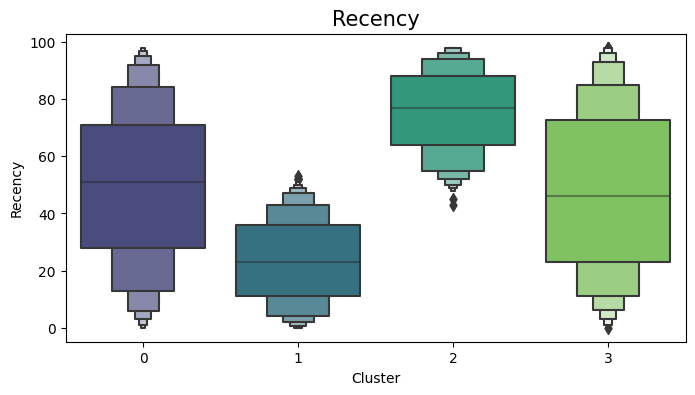

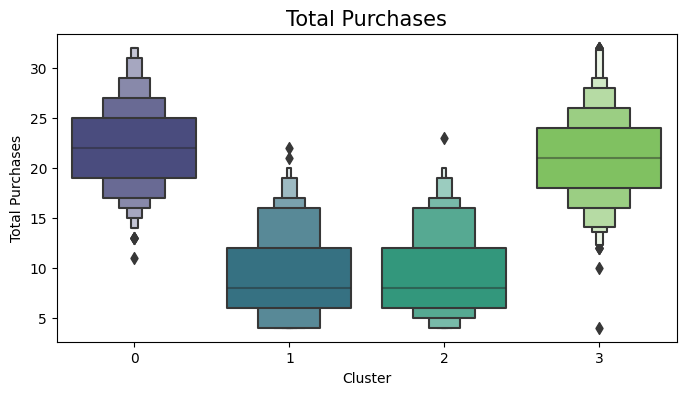

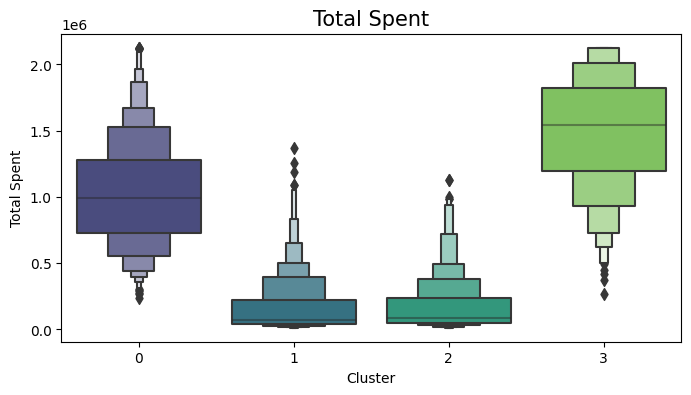

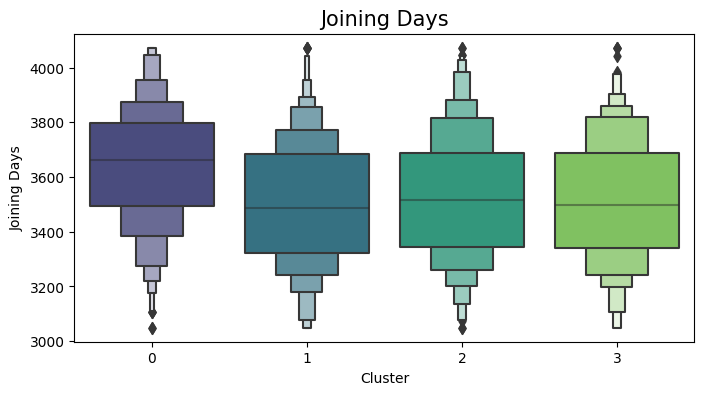

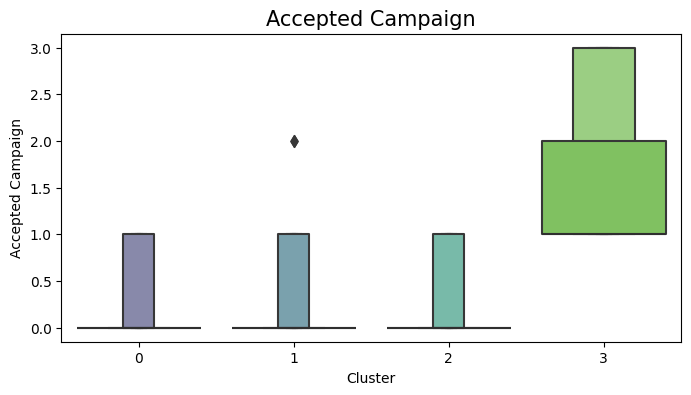

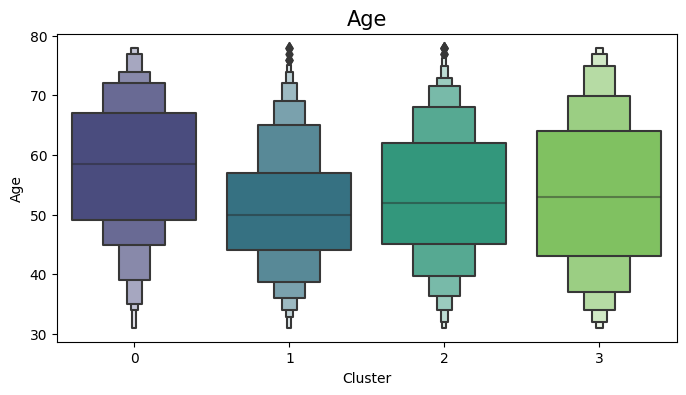

In [ ]:
for i in clust.columns:
  plt.figure(figsize=(8,4))
  pl = sns.boxenplot(x = df_final_clus['Cluster'], y = clust[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

#### Income per Cluster

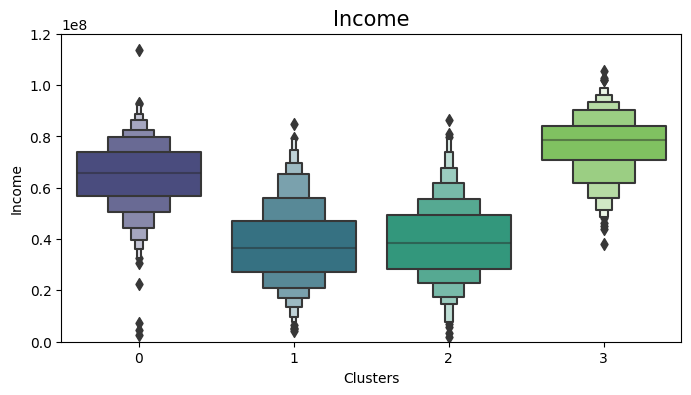

In [ ]:
plt.figure(figsize=(8,4))
pl = sns.boxenplot(x=df_final['Clusters'], y=df_final['Income'], palette='viridis')
pl.set_title('Income', fontsize=15)
plt.ylim(0, 120000000)
plt.show()

#### Conversion Rate per Cluster

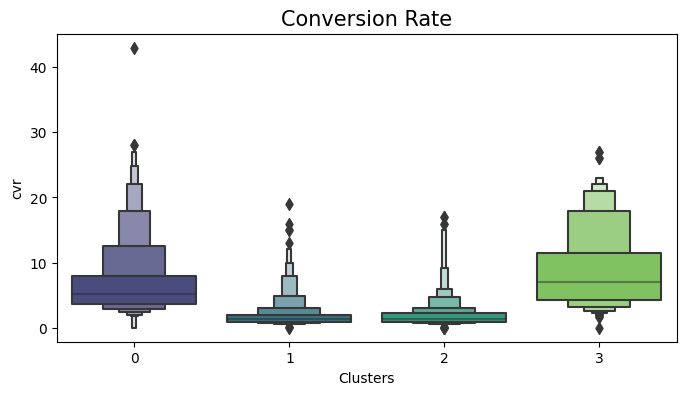

In [ ]:
plt.figure(figsize=(8,4))
pl = sns.boxenplot(x=df_final['Clusters'], y=df_final['cvr'], palette='viridis')
pl.set_title('Conversion Rate', fontsize=15)
plt.show()

In [ ]:
df_final.to_csv('marketing_campaign_customer_clustering_final.csv', index=False)

In [ ]:
#files.download('marketing_campaign_customer_clustering_final.csv')

#### Age Group in Each Cluster

In [ ]:
df_ag = df_final.groupby(['Clusters', 'age_group']).agg({'edu_map':'count'}).reset_index()
df_ag = df_ag.rename(columns={'edu_map':'total_customers'})
df_ag['sum'] = df_ag['total_customers'].sum()
df_ag['percentage'] = round((df_ag['total_customers']/df_ag['sum'])*100, 3)
df_ag

Clusters     age_group  total_customers   sum  percentage
0          0  Dewasa Akhir              468  2240      20.893
1          0   Dewasa Awal               26  2240       1.161
2          0   Lanjut Usia              226  2240      10.089
3          1  Dewasa Akhir              521  2240      23.259
4          1   Dewasa Awal               38  2240       1.696
5          1   Lanjut Usia               72  2240       3.214
6          2  Dewasa Akhir              476  2240      21.250
7          2   Dewasa Awal               32  2240       1.429
8          2   Lanjut Usia              107  2240       4.777
9          3  Dewasa Akhir              189  2240       8.438
10         3   Dewasa Awal               24  2240       1.071
11         3   Lanjut Usia               61  2240       2.723

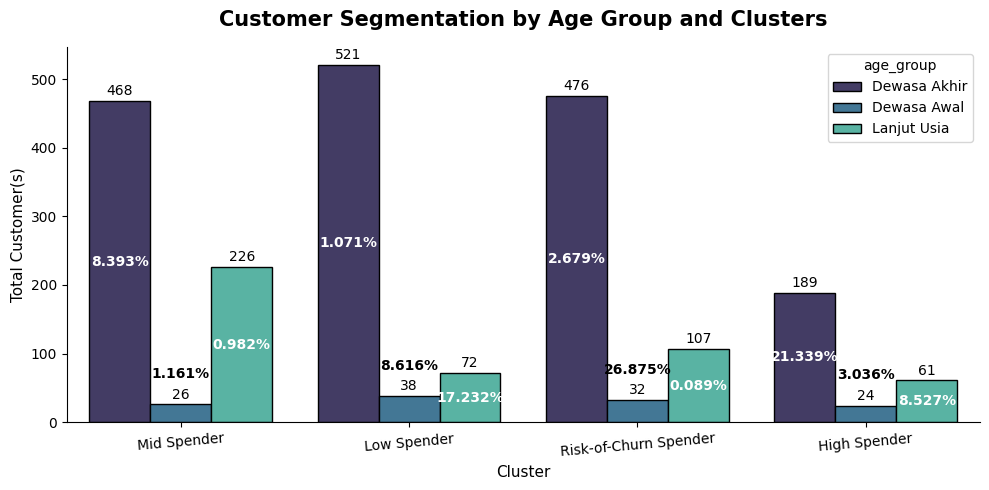

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Customer Segmentation by Age Group and Clusters", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='Clusters', y='total_customers', data=df_ag, hue='age_group', edgecolor='black', palette='mako')

plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Total Customer(s)', fontsize=11)
plt.xticks(np.arange(4), ['Mid Spender', 'Low Spender', 'Risk-of-Churn Spender', 'High Spender'], rotation=5)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[0], ['8.393%', '1.071%', '2.679%', '21.339%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['1.161%', '8.616%', '26.875%', '3.036%'], padding=17, color='black', weight='bold')
plt.bar_label(ax.containers[2], ['0.982%', '17.232%', '0.089%', '8.527%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

In [ ]:
fd = df_final.groupby(['Clusters', 'cluster_mapped']).describe(include='all')
HTML(fd.to_html())

#### Interpretation Cluster Summary

**Cluster 0 (Mid Spender):**
- Largest group with 720 users
- Dominated by late adults (36-65 years old), mostly married, and without dependents at home
- Second-highest average income and expenditure positions (IDR 65.2M/year and IDR 1.02M/year respectively)
- Relatively low average NumWebVisitMonth (5 times a month)
- Most recent joined days (3635 days joined)
- Highest average total purchases (22 items)
- Second-highest average recency (49 days)
- Not frequent shoppers but big spenders
- Not very responsive to campaigns (Organic customer acquisition)

**Cluster 1 (Low Spender):**
- Second-largest group with 631 users
- Dominated by late adults (36-65 years old), mostly married, and without dependents at home
- Lowest average income and expenditure positions (IDR 39.2M/year and IDR 161k/year respectively)
- Relatively high average NumWebVisitMonth (6 times a month)
- Most recent average joined days (3498 days joined)
- Lowest average total purchases (9 items)
- Lowest average recency (23 days)
- Frequent shoppers with small purchases
- Not very responsive to campaigns (Organic customer acquisition)

**Cluster 2 (Risk of Churn):**
- Third-largest group with 615 users
- Dominated by late adults (36-65 years old), mostly married, and with dependents at home
- Second-lowest average income and expenditure positions (IDR 39.3M/year and IDR 170k/year respectively)
- Relatively high average NumWebVisitMonth (6 times a month)
- Second-oldest average joined days (3518 days joined)
- Lowest average total purchases (9 items)
- Highest average recency (75 days)
- Not frequent shoppers and small purchases
- Not very responsive to campaigns (Organic customer acquisition)

**Cluster 3 (High Spender):**
- Smallest group with 274 users
- Dominated by Late adults (36-65 years old), mostly married, and with dependents at home
- Highest average income and expenditure positions (around IDR 76.9M/year and IDR 1.51M/year respectively)
- Lowest average NumWebVisitMonth (3 times a month)
- Second-recent average joined days (3510 days joined)
- Second-highest average total purchases (21 items)
- Second-lowest average recency (47 days)
- Frequent shoppers and big spenders
- Very responsive to campaigns (Non-Organic customer acquisition)

#### Recommendation & Potential Impact

##### Recommendation

- **Implement targeted marketing campaigns by membership program**:
To further increase customer retention and attract more customers to shop on our platform, it is recommended to create a membership tier program. The program can have four membership tiers (Platinum, Gold, Silver, and Bronze) based on the customer clusters identified in the analysis (Platinum: High Spender, Gold: Mid Spender, Silver: Low Spender, Bronze: Risk of Churn).
Each membership tier can have different privileges for customers, with the highest membership tier receiving the greatest privileges. For example, Platinum members can receive exclusive access to high-end products, personalized promotions, and free shipping on all orders, while Gold members can receive early access to sales and discounts, and personalized product recommendations. Silver members can receive limited-time promotions and early access to new products, while Bronze members can receive discounts on select products.
By implementing targeted marketing campaigns and a membership tier program, we can increase customer retention, attract new customers, and ultimately, drive revenue growth for our platform.


- **Improve website user experience**:
Given that the website visit frequency is an important factor in predicting customer behavior, it is recommended to improve the website user experience to encourage customers to visit more often. This can be achieved by optimizing the website design, improving site speed, and making it more user-friendly.


- **Increase product offerings**:
Since customers in the Low Spender and Risk of Churn clusters tend to make smaller purchases, it may be beneficial to expand the product offerings to include more affordable options. This can help attract more customers and encourage them to make more frequent purchases.


- **Focus on customer retention**:
The Risk of Churn cluster is particularly at risk of leaving, so it is important to focus on customer retention efforts for this segment. This can be achieved by offering personalized promotions or special deals, providing excellent customer service, and addressing any complaints or issues promptly.

##### Potential Impact

- If we focus on continuously monitoring the High Spender group, we will still get potential GMV of IDR 413 million, while for the Mid Spender group, it will be IDR 736 million.

In [ ]:
print('Total Spent of Medium Spender: '+str(df_final[df_final['Clusters']==0].amount_transaction.sum()))
print('Total Spent of Low Spender: '+str(df_final[df_final['Clusters']==1].amount_transaction.sum()))
print('Total Spent of Risk-of-Churn : '+str(df_final[df_final['Clusters']==2].amount_transaction.sum()))
print('Total Spent of High Spender: '+str(df_final[df_final['Clusters']==3].amount_transaction.sum()))
print('Total Spent: '+str(736601000+101875000+104988000+413524000))

Total Spent of Medium Spender: 736601000
Total Spent of Low Spender: 101875000
Total Spent of Risk-of-Churn : 104988000
Total Spent of High Spender: 413524000
Total Spent: 1356988000
